# 1. Digital image in Python


I'm using a `OpenCV` library and part of `matplotlib` package for displaying images in Jupyter Notebook.

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
print(cv2.__version__)


4.7.0


Readin image into matrix is done with `imread` method. In case when open file goes right function returns matrix:
* 2-dimensional for grey scale images
* 3-dimensional for colour images

In [2]:
img = cv2.imread('images/baboon.jpg')
# image matrix - colour image
print(img.shape, type(img))
img2 = cv2.imread('images/baboon.jpg',0)
# image matrix - grey scale image
print(img2.shape, type(img2))

(512, 512, 3) <class 'numpy.ndarray'>
(512, 512) <class 'numpy.ndarray'>


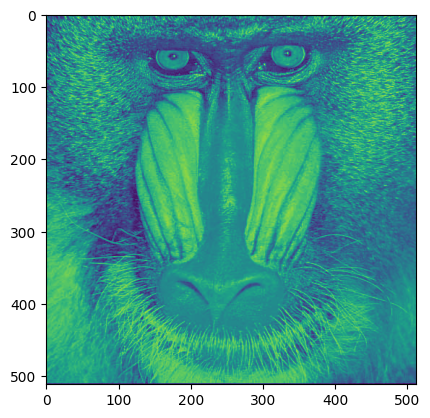

In [3]:
plt.imshow(img2)

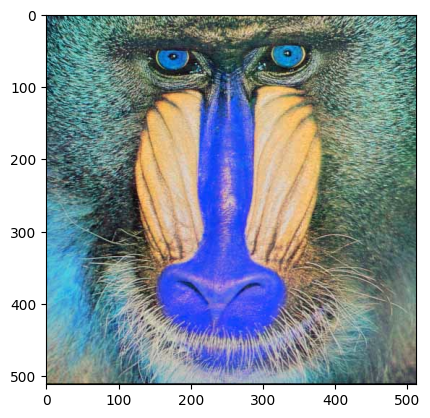

In [4]:
# colour image with wrong order of components
plt.imshow(img)

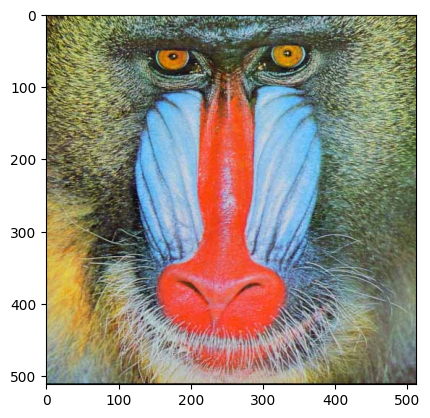

In [5]:
# format image frm BGR to RGB space
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img1) 

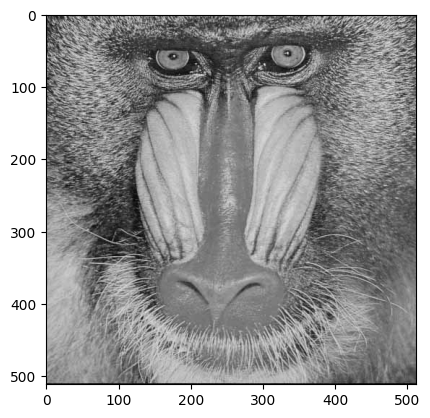

In [6]:
# gray scale image
plt.imshow(img2,cmap='gray')

Another types of colours spaces

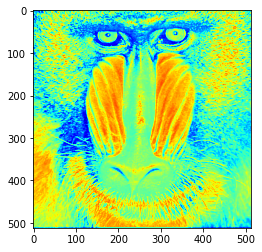

In [111]:
plt.imshow(img2,cmap='jet')

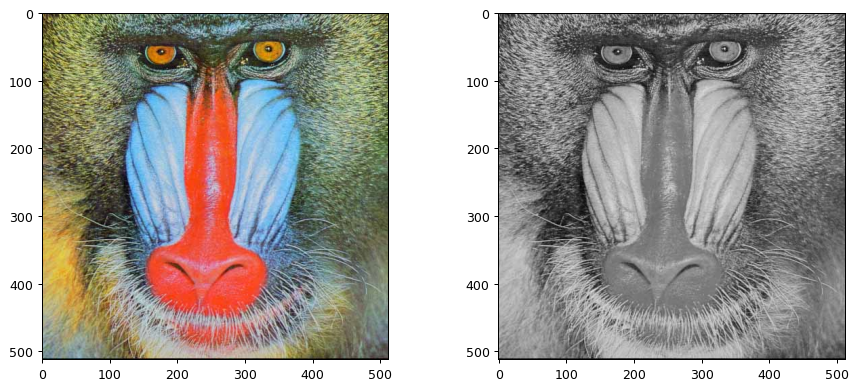

In [9]:
img_rgb = cv2.imread('images/baboon.jpg')
img_grey = cv2.imread('images/baboon.jpg',0)
plt.figure(figsize=(12,5), dpi = 90)
plt.subplot(1,2,1)   
plt.imshow(cv2.cvtColor(img_rgb,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(img_grey,cmap='gray')      

## 1.1 Access to image pixels

If images are `numpy` matrixes then there is a possibility to check size and data type witch the same methods.

In [16]:
print("Colour image - type: ", img_rgb.dtype, ", size: ", img_rgb.shape, ", memory space: ", img_rgb.size)
print("Grey scale image - type: ", img_grey.dtype, ", size: ", img_grey.shape, ", memory space: ", img_grey.size)


Colour image - type:  uint8 , size:  (512, 512, 3) , memory space:  786432
Grey scale image - type:  uint8 , size:  (512, 512) , memory space:  262144


In [18]:
px = 100
py = 100
pix1 = img_rgb[px,py]
pix1g = img_rgb[px,py,1]
pix2 = img_grey[px,py]
print("img_rgb(",px,",",py,")=",pix1)
print("img_rgb(",px,",",py,",1)=",pix1g)
print("img_grey(",px,",",py,")=",pix2)

img_rgb( 100 , 100 )= [111 133 121]
img_rgb( 100 , 100 ,1)= 133
img_grey( 100 , 100 )= 127


Zmiana wartości pikseli

In [20]:
# one component
print("before: ",img_rgb[px,py])
img_rgb[px,py,2]=1
print("after change one component: ",img_rgb[px,py])
# whole pixel
img_rgb[px,py]= [10,20,30]
print("after change whole pixel: ",img_rgb[px,py])

before:  [10 20 30]
after change one component:  [10 20  1]
after change whole pixel:  [10 20 30]


ROI - Region Of Interests requires coodrinates referensce.

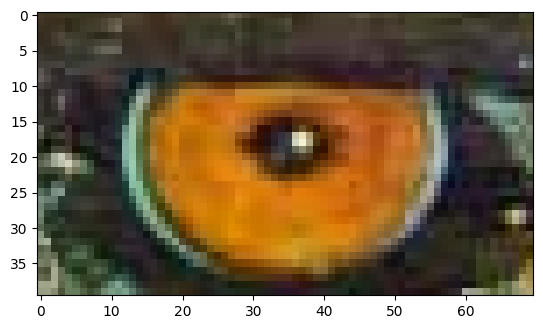

In [21]:
eye = img[40:80,140:210]
plt.imshow(cv2.cvtColor(eye,cv2.COLOR_BGR2RGB))

## 1.2 Colour spaces

Obraz kolorowy składa się z trzech składowych. W modelu RGB składowe te określają intensywność trzech barw podstawowych czerwonej, zielonej i niebieskiej. Aby otrzymać poszczególne składowe, obraz kolorowy należy zdekomponować na trzy obrazy w skali szarości. Możliwa jest także operacja odwrotna - z trzech obrazów składowych koloru tworzony jest jeden obraz kolorowy.

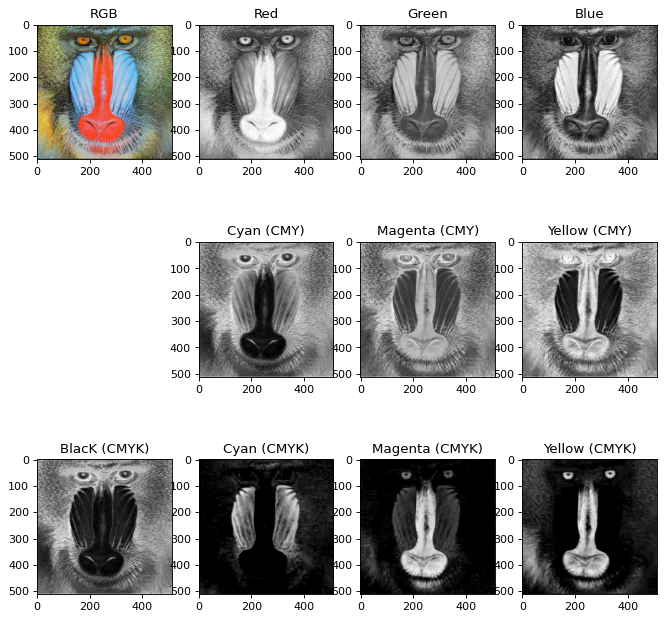

In [24]:
img = cv2.imread('images/baboon.jpg')
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10), dpi= 80)
ax = plt.subplot(3,4,1)   
ax.set_title("RGB")
plt.imshow(rgb_img)
ax = plt.subplot(3,4,2)
ax.set_title("Red")
plt.imshow(rgb_img[:,:,0], cmap='gray')
ax = plt.subplot(3,4,3)
ax.set_title("Green")
plt.imshow(rgb_img[:,:,1], cmap='gray')
ax = plt.subplot(3,4,4)
ax.set_title("Blue")
plt.imshow(rgb_img[:,:,2], cmap='gray')

# determine the CMY components
cmy_c = 255 - rgb_img[:,:,0]
cmy_m = 255 - rgb_img[:,:,1]
cmy_y = 255 - rgb_img[:,:,2] 

ax = plt.subplot(3,4,6)
ax.set_title("Cyan (CMY)")
plt.imshow(cmy_c,cmap='gray')
ax = plt.subplot(3,4,7)
ax.set_title("Magenta (CMY)")
plt.imshow(cmy_m,cmap='gray')
ax = plt.subplot(3,4,8)
ax.set_title("Yellow (CMY)")
plt.imshow(cmy_y,cmap='gray')

# determine the CMYK components
cmyk_k = np.minimum(cmy_c,np.minimum(cmy_m,cmy_y))
cmyk_c = cmy_c - cmyk_k
cmyk_m = cmy_m - cmyk_k
cmyk_y = cmy_y - cmyk_k

ax = plt.subplot(3,4,9)
ax.set_title("BlacK (CMYK)")
plt.imshow(cmyk_k,cmap='gray')
ax = plt.subplot(3,4,10)
ax.set_title("Cyan (CMYK)")
plt.imshow(cmyk_c,cmap='gray')
ax = plt.subplot(3,4,11)
ax.set_title("Magenta (CMYK)")
plt.imshow(cmyk_m,cmap='gray')
ax = plt.subplot(3,4,12)
ax.set_title("Yellow (CMYK)")
plt.imshow(cmyk_y,cmap='gray')

Another way for display matrix as a single one makes from three separates matrixes. Below example shows how to separate for three components RGB, YUV and HSV colours spaces.

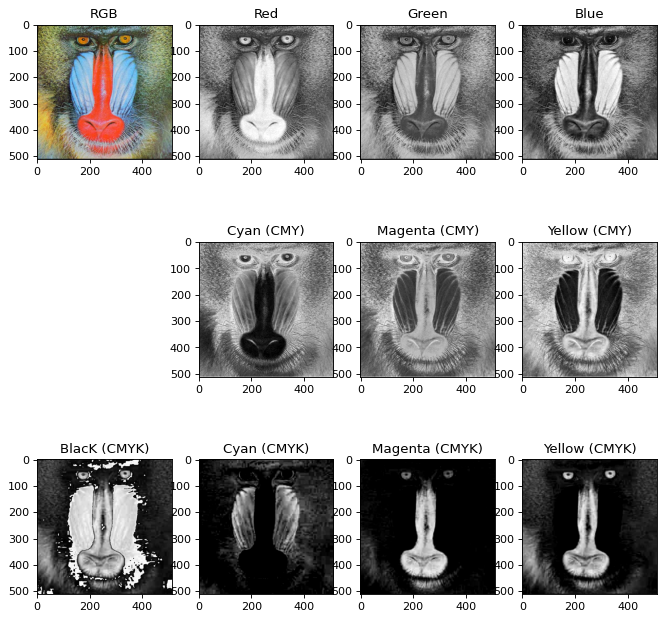

In [26]:
img = cv2.imread('images/baboon.jpg')
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10), dpi= 80)
ax = plt.subplot(3,4,1)   
ax.set_title("RGB")
plt.imshow(rgb_img)
ax = plt.subplot(3,4,2)
ax.set_title("Red")
plt.imshow(rgb_img[:,:,0], cmap='gray')
ax = plt.subplot(3,4,3)
ax.set_title("Green")
plt.imshow(rgb_img[:,:,1], cmap='gray')
ax = plt.subplot(3,4,4)
ax.set_title("Blue")
plt.imshow(rgb_img[:,:,2], cmap='gray')

# determine the CMY components
cmy_c = 255 - rgb_img[:,:,0]
cmy_m = 255 - rgb_img[:,:,1]
cmy_k = 255 - rgb_img[:,:,2] 

ax = plt.subplot(3,4,6)
ax.set_title("Cyan (CMY)")
plt.imshow(cmy_c,cmap='gray')
ax = plt.subplot(3,4,7)
ax.set_title("Magenta (CMY)")
plt.imshow(cmy_m,cmap='gray')
ax = plt.subplot(3,4,8)
ax.set_title("Yellow (CMY)")
plt.imshow(cmy_y,cmap='gray')

# determine the CMYK components
cmyk_k = 255 - np.maximum(rgb_img[:,:,0],rgb_img[:,:,1],rgb_img[:,:,1])
cmyk_c = cmy_c - cmyk_k
cmyk_m = cmy_m - cmyk_k
cmyk_k = cmy_k - cmyk_k

ax = plt.subplot(3,4,9)
ax.set_title("BlacK (CMYK)")
plt.imshow(cmyk_k,cmap='gray')
ax = plt.subplot(3,4,10)
ax.set_title("Cyan (CMYK)")
plt.imshow(cmyk_c,cmap='gray')
ax = plt.subplot(3,4,11)
ax.set_title("Magenta (CMYK)")
plt.imshow(cmyk_m,cmap='gray')
ax = plt.subplot(3,4,12)
ax.set_title("Yellow (CMYK)")
plt.imshow(cmyk_y,cmap='gray')